惑星軌道周期は1880.3235119199485日
白色矮星軌道周期は1496.1574791992557日


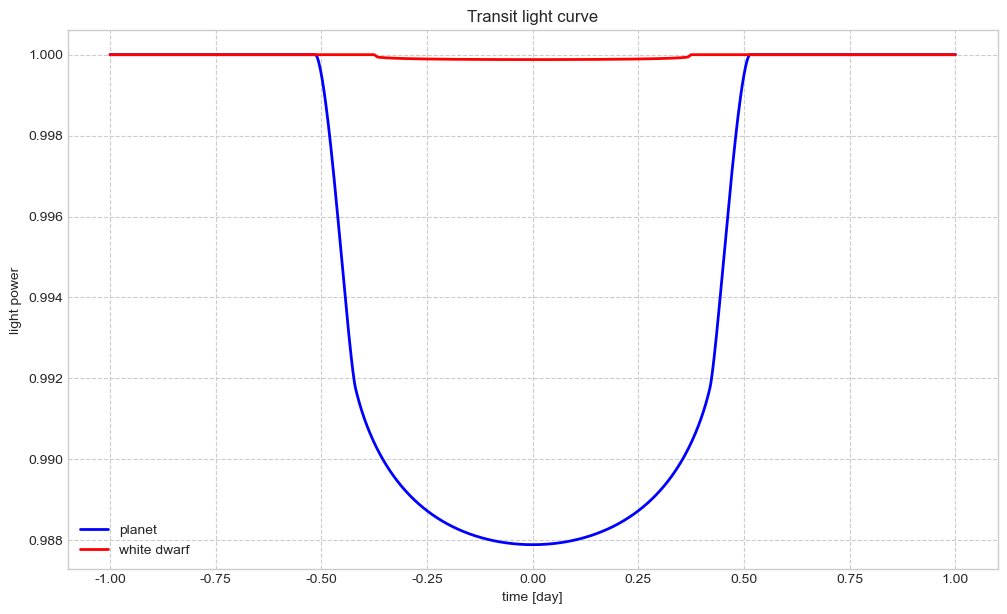

In [4]:
import batman
import numpy as np
import matplotlib.pyplot as plt


#定数
M_sun = 2.0e+30  #太陽質量(kg)
M_jupiter = 1/1000 * M_sun  #木星質量(kg)
R_sun = 7.0e+5  #太陽半径(km)
R_jupiter = 1/10 * R_sun  #木星半径(km)
R_earth = 1/100 * R_sun  #地球半径(km)
au = 149.6e+6  #1天文単位(km)
G = 6.674e-20  #万有引力定数(km^3,kg^-1,s^-2)

M_planet = 13 * M_jupiter  #惑星質量(km)
M_wd = 0.6 * M_sun  #白色矮星質量(km)
R_planet = 1 * R_jupiter  #惑星半径(km)
R_wd = 1 * R_earth  #白色矮星質量(km)
a = 3 * au  #軌道長半径(km)
inc = 90.0  #軌道傾斜角(b=0)

#軌道周期(ケプラー3)
def per(m):
  return 2 * np.pi * np.sqrt(a**3 / (G * (M_sun + m) ) )

per_planet = per(M_planet) / 86400  #惑星軌道周期(day)
per_wd = per(M_wd) / 86400  #白色矮星軌道周期(day)

print(f"惑星軌道周期は{per_planet}日")
print(f"白色矮星軌道周期は{per_wd}日")


#トランジットライトカーブ（惑星）
params_planet = batman.TransitParams()
params_planet.t0 = 0.0  #中心時間
params_planet.per = per_planet  #軌道周期
params_planet.rp = R_planet / R_sun  #惑星と恒星の半径比
params_planet.a = a / R_sun  #軌道長半径(恒星半径に対する比)
params_planet.inc = inc  #軌道傾斜角
params_planet.ecc = 0.0  #離心率
params_planet.w = 0.0  #近日点引数(真円なので関係ない)
params_planet.limb_dark = "quadratic"  #周縁減光モデルを二次に設定
params_planet.u = [0.4, 0.25]  #周縁減光モデルの係数
t = np.linspace(-1.0, 1.0, 1000)  #表示する時間
model_planet = batman.TransitModel(params_planet, t)
flux_planet = model_planet.light_curve(params_planet)

#トランジットライトカーブの生成（白色矮星）
params_wd = batman.TransitParams()
params_wd.t0 = 0.0
params_wd.per = per_wd
params_wd.rp = R_wd / R_sun
params_wd.a = a / R_sun
params_wd.inc = inc
params_wd.ecc = 0.0
params_wd.w = 0.0
params_wd.limb_dark = "quadratic"
params_wd.u = [0.4, 0.25]
model_wd = batman.TransitModel(params_wd, t)
flux_wd = model_wd.light_curve(params_wd)

#プロット
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))
line1, = ax.plot(t, flux_planet, color='blue', linewidth=2, label='planet') # Get line artist
line2, = ax.plot(t, flux_wd, color='red', linewidth=2, label='white dwarf') # Get line artist
ax.set_title("Transit light curve") # Apply font_prop here
ax.set_xlabel("time [day]") # Apply font_prop here
ax.set_ylabel("light power") # Apply font_prop here
ax.tick_params(axis='both')
ax.grid(True, linestyle='--')
ax.legend()

plt.show()